<a href="https://colab.research.google.com/github/Saphall/Machine-Learning/blob/main/8Projects/0Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers,losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Importing DataSets 
* Source : http://peipa.essex.ac.uk/pix/mias/


In [ ]:
!wget http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz

--2021-05-18 14:42:09--  http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz
Resolving peipa.essex.ac.uk (peipa.essex.ac.uk)... 155.245.93.3
Connecting to peipa.essex.ac.uk (peipa.essex.ac.uk)|155.245.93.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111154265 (106M) [application/gzip]
Saving to: ‘all-mias.tar.gz’

all-mias.tar.gz     100%[===================>] 106.00M  10.3MB/s    in 12s     

2021-05-18 14:42:22 (8.87 MB/s) - ‘all-mias.tar.gz’ saved [111154265/111154265]



In [ ]:
import os
os.listdir()

['.config', 'all-mias.tar.gz', 'sample_data']

In [ ]:
!tar -xvf /content/all-mias.tar.gz

Info.txt
Licence.txt
README
mdb001.pgm
mdb002.pgm
mdb003.pgm
mdb004.pgm
mdb005.pgm
mdb006.pgm
mdb007.pgm
mdb008.pgm
mdb009.pgm
mdb010.pgm
mdb011.pgm
mdb012.pgm
mdb013.pgm
mdb014.pgm
mdb015.pgm
mdb016.pgm
mdb017.pgm
mdb018.pgm
mdb019.pgm
mdb020.pgm
mdb021.pgm
mdb022.pgm
mdb023.pgm
mdb024.pgm
mdb025.pgm
mdb026.pgm
mdb027.pgm
mdb028.pgm
mdb029.pgm
mdb030.pgm
mdb031.pgm
mdb032.pgm
mdb033.pgm
mdb034.pgm
mdb035.pgm
mdb036.pgm
mdb037.pgm
mdb038.pgm
mdb039.pgm
mdb040.pgm
mdb041.pgm
mdb042.pgm
mdb043.pgm
mdb044.pgm
mdb045.pgm
mdb046.pgm
mdb047.pgm
mdb048.pgm
mdb049.pgm
mdb050.pgm
mdb051.pgm
mdb052.pgm
mdb053.pgm
mdb054.pgm
mdb055.pgm
mdb056.pgm
mdb057.pgm
mdb058.pgm
mdb059.pgm
mdb060.pgm
mdb061.pgm
mdb062.pgm
mdb063.pgm
mdb064.pgm
mdb065.pgm
mdb066.pgm
mdb067.pgm
mdb068.pgm
mdb069.pgm
mdb070.pgm
mdb071.pgm
mdb072.pgm
mdb073.pgm
mdb074.pgm
mdb075.pgm
mdb076.pgm
mdb077.pgm
mdb078.pgm
mdb079.pgm
mdb080.pgm
mdb081.pgm
mdb082.pgm
mdb083.pgm
mdb084.pgm
mdb085.pgm
mdb086.pgm
mdb087.pgm
mdb088.pgm
mdb0

# Information about data


* REFNUM : MIAS database reference number.

* BG : Character of background tissue: 
                F - Fatty 
                G - Fatty-glandular
                D - Dense-glandular

* CLASS : Class of abnormality present:
                CALC - Calcification
                CIRC - Well-defined/circumscribed masses
                SPIC - Spiculated masses
                MISC - Other, ill-defined masses
                ARCH - Architectural distortion
                ASYM - Asymmetry
                NORM - Normal

* SEVERITY : Severity of abnormality;
                B - Benign
                M - Malignant
                
* X, Y : x,y image-coordinates of centre of abnormality.

* RADIUS : Approximate radius (in pixels) of a circle enclosing the abnormality.

In [ ]:
import pandas as pd
os.listdir()
info = pd.read_csv('/content/Info.txt',sep=' ')

In [ ]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS,Unnamed: 7
0,mdb001,G,CIRC,B,535.0,425.0,197.0,NaN
1,mdb002,G,CIRC,B,522.0,280.0,69.0,NaN
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0,NaN
...,...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN,NaN


# Pre-process Data

In [ ]:
# Removing Un-necessary column: "Unnamed: 7"

info=info.drop('Unnamed: 7',axis=1)

In [ ]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
# Removing information about Null-values

info.dropna(subset=['SEVERITY'],inplace=True)
info.reset_index(inplace=True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
# Removing index-3 with repeated REFNUM 

info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info

,level_0,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
4,5,12,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...,...,...
117,118,281,mdb274,F,MISC,M,127.0,505.0,123.0
118,119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
119,120,319,mdb312,F,MISC,B,240.0,263.0,20.0
120,121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
# Taking preprocessed Images-filename in dictionary

ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]

In [ ]:
# HelpFul images to train-test

ids

{0: 'mdb001',
 1: 'mdb002',
 2: 'mdb005',
 3: 'mdb010',
 4: 'mdb012',
 5: 'mdb013',
 6: 'mdb015',
 7: 'mdb017',
 8: 'mdb019',
 9: 'mdb021',
 10: 'mdb023',
 11: 'mdb025',
 12: 'mdb028',
 13: 'mdb030',
 14: 'mdb032',
 15: 'mdb058',
 16: 'mdb059',
 17: 'mdb063',
 18: 'mdb069',
 19: 'mdb072',
 20: 'mdb075',
 21: 'mdb080',
 22: 'mdb081',
 23: 'mdb083',
 24: 'mdb090',
 25: 'mdb091',
 26: 'mdb092',
 27: 'mdb095',
 28: 'mdb097',
 29: 'mdb099',
 30: 'mdb102',
 31: 'mdb104',
 32: 'mdb105',
 33: 'mdb107',
 34: 'mdb110',
 35: 'mdb111',
 36: 'mdb115',
 37: 'mdb117',
 38: 'mdb120',
 39: 'mdb121',
 40: 'mdb124',
 41: 'mdb125',
 42: 'mdb126',
 43: 'mdb127',
 44: 'mdb130',
 45: 'mdb132',
 46: 'mdb132',
 47: 'mdb134',
 48: 'mdb141',
 49: 'mdb142',
 50: 'mdb144',
 51: 'mdb144',
 52: 'mdb145',
 53: 'mdb148',
 54: 'mdb150',
 55: 'mdb152',
 56: 'mdb155',
 57: 'mdb158',
 58: 'mdb160',
 59: 'mdb163',
 60: 'mdb165',
 61: 'mdb167',
 62: 'mdb170',
 63: 'mdb171',
 64: 'mdb175',
 65: 'mdb178',
 66: 'mdb179',
 67: 

# Turning our Outputs B-M to 1-0

In [ ]:
# Benign=1
# Malignant=0

label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [ ]:
import numpy as np

label = np.array(label)

In [ ]:
label.shape

(122,)

In [ ]:
# Defing every images filepaths into list

img_name = []

for i in range(len(label)):
        img_name.append('/content/' + info.REFNUM[i]+ '.pgm')

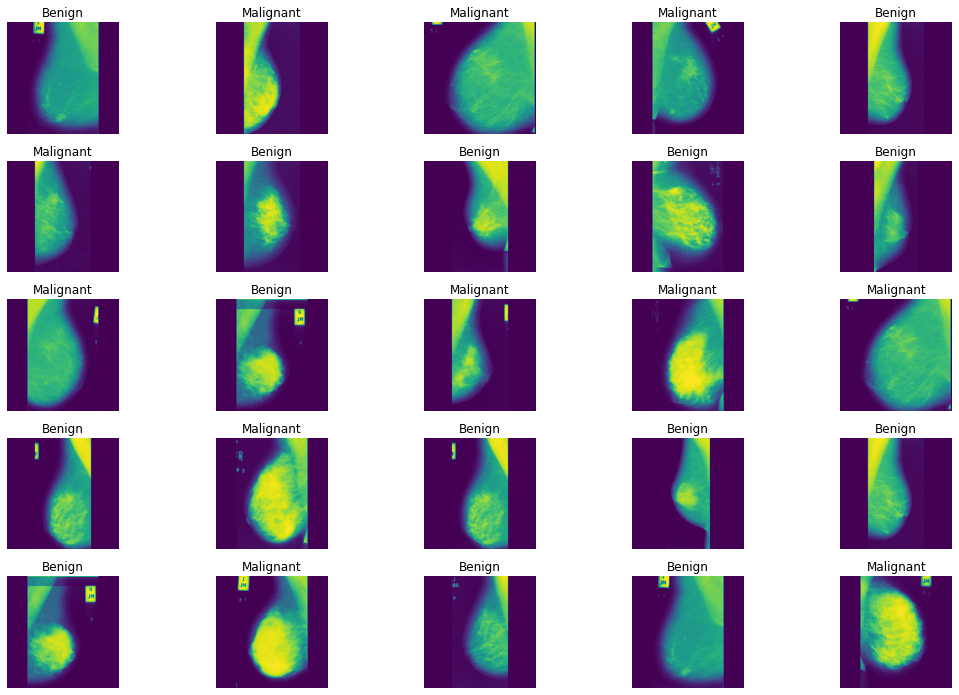

In [ ]:
# View Random Images
import cv2
import matplotlib.pyplot as plt
import random

def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('Benign')
        else:
            plt.title('Malignant')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')
    

random_images = view_25_random_image()

# Read Images and Labels and Augmentaion of Images

In [ ]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

        

In [ ]:
last_label = np.array(last_label)
img_path = np.array(img_path)


# Split Train and Test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35136, 8784, 35136, 8784)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train.shape

(35136, 224, 224)

In [ ]:
x_test.shape

(8784, 224, 224)

In [ ]:
(a,b,c)=x_train.shape # (35136, 224, 224)
x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale

(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))

# Build a model

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 54, 54, 64)        4

#Define Callbacks

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])


Epoch 1/100
440/440 [==============================] - 218s 419ms/step - loss: 4.6161 - accuracy: 0.5370 - val_loss: 0.6477 - val_accuracy: 0.6143

Epoch 00001: val_loss improved from inf to 0.64767, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 2/100
440/440 [==============================] - 181s 411ms/step - loss: 0.6325 - accuracy: 0.6319 - val_loss: 0.5730 - val_accuracy: 0.7015

Epoch 00002: val_loss improved from 0.64767 to 0.57300, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 3/100
440/440 [==============================] - 181s 411ms/step - loss: 0.5268 - accuracy: 0.7314 - val_loss: 0.4683 - val_accuracy: 0.7695

Epoch 00003: val_loss improved from 0.57300 to 0.46825, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 4/100
440/440 [==============================] - 181s 411ms/step - loss: 0.4298 - accuracy: 0.7988 - val_loss: 0.4078 - val_accuracy: 0.8176

Epoch 00004: val_loss improved from 0.46825 to 0.40784,

In [ ]:
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('Test_accuracy of model = ' + str("{:.4f}".format(accuracy*100))+' %')

275/275 [==============================] - 22s 73ms/step - loss: 0.1683 - accuracy: 0.9450
Test_loss_value = 0.1682627648115158
Test_accuracy of model = 94.5014 %


# Visualize our result

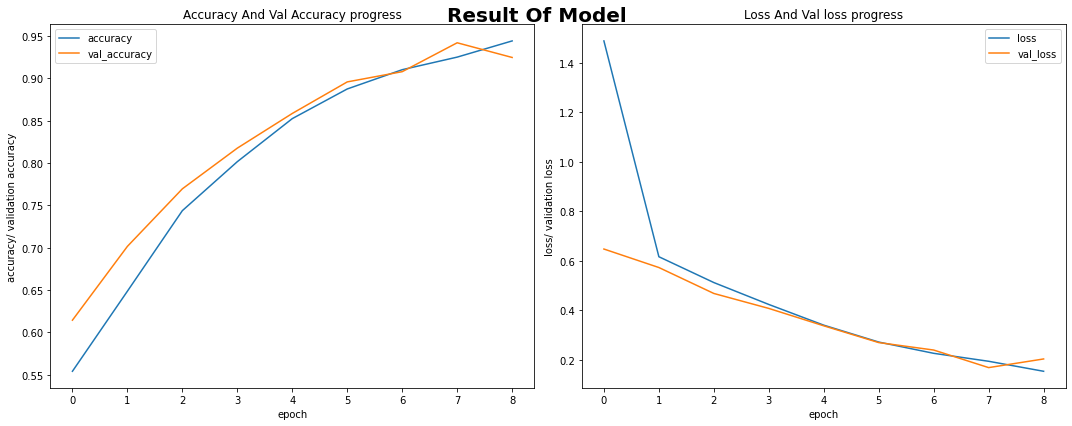

In [ ]:
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[5.7656896e-01],
       [2.5505149e-01],
       [1.2178690e-07],
       ...,
       [3.7715655e-02],
       [9.9417913e-01],
       [7.0690468e-02]], dtype=float32)

#**Testing the Images**


33
The prediction of image with name mdb107 is: Benign


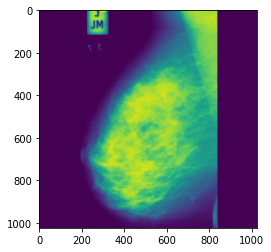

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

i = random.randint(0,121)
print(i)

img = cv2.imread(img_name[i], 0)
plt.imshow(img);


if y_pred[i] <= 0.5:
    result = "Malignant"
else:
    result = "Benign"

print(f"The prediction of image with name {ids[i]} is:",result)

In [ ]:
# Checking the actual result
### We know: Benign = 1, Malignant = 0

print(i)
print(info.head(i+1))

if label[i] == 1:
  result ='Benign'
else:
  result ='Malignant'

print('The acutal image is :',result)

33
    level_0  index  REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0         0      0  mdb001  G  CIRC        B  535.0  425.0   197.0
1         1      1  mdb002  G  CIRC        B  522.0  280.0    69.0
2         2      4  mdb005  F  CIRC        B  477.0  133.0    30.0
3         4     10  mdb010  F  CIRC        B  525.0  425.0    33.0
4         5     12  mdb012  F  CIRC        B  471.0  458.0    40.0
5         6     13  mdb013  G  MISC        B  667.0  365.0    31.0
6         7     15  mdb015  G  CIRC        B  595.0  864.0    68.0
7         8     17  mdb017  G  CIRC        B  547.0  573.0    48.0
8         9     19  mdb019  G  CIRC        B  653.0  477.0    49.0
9        10     21  mdb021  G  CIRC        B  493.0  125.0    49.0
10       11     23  mdb023  G  CIRC        M  538.0  681.0    29.0
11       12     25  mdb025  F  CIRC        B  674.0  443.0    79.0
12       13     28  mdb028  F  CIRC        M  338.0  314.0    56.0
13       14     30  mdb030  G  MISC        B  322.0  676.0 

40
The prediction of image with name mdb124 is: Malignant


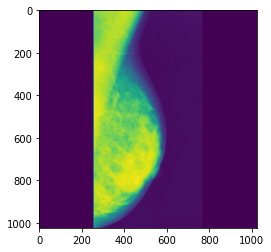

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

i = random.randint(0,121)
print(i)

img = cv2.imread(img_name[i], 0)
plt.imshow(img);


if y_pred[i] <= 0.5:
    result = "Malignant"
else:
    result = "Benign"

print(f"The prediction of image with name {ids[i]} is:",result)

In [ ]:
# Checking the actual result
### We know: Benign = 1, Malignant = 0

print(i)
print(info.head(i+1))

if label[i] == 1:
  result ='Benign'
else:
  result ='Malignant'

print('The acutal image is :',result)

40
    level_0  index  REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0         0      0  mdb001  G  CIRC        B  535.0  425.0   197.0
1         1      1  mdb002  G  CIRC        B  522.0  280.0    69.0
2         2      4  mdb005  F  CIRC        B  477.0  133.0    30.0
3         4     10  mdb010  F  CIRC        B  525.0  425.0    33.0
4         5     12  mdb012  F  CIRC        B  471.0  458.0    40.0
5         6     13  mdb013  G  MISC        B  667.0  365.0    31.0
6         7     15  mdb015  G  CIRC        B  595.0  864.0    68.0
7         8     17  mdb017  G  CIRC        B  547.0  573.0    48.0
8         9     19  mdb019  G  CIRC        B  653.0  477.0    49.0
9        10     21  mdb021  G  CIRC        B  493.0  125.0    49.0
10       11     23  mdb023  G  CIRC        M  538.0  681.0    29.0
11       12     25  mdb025  F  CIRC        B  674.0  443.0    79.0
12       13     28  mdb028  F  CIRC        M  338.0  314.0    56.0
13       14     30  mdb030  G  MISC        B  322.0  676.0 

# Load Model


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
!mkdir Model
!mv ./final* Model

In [ ]:
!ls

Model  sample_data


In [ ]:
 # cd ..

In [ ]:
cd Model

/content/Model


In [ ]:
!unzip './final*.zip'

Archive:  ./final_working_model.zip
   creating: assets/
  inflating: saved_model.pb          
   creating: variables/
  inflating: variables/variables.data-00000-of-00001  
  inflating: variables/variables.index  


In [ ]:
cd ..

/content


In [ ]:
loaded_model = load_model('Model')

In [ ]:
# prediction = loaded_model.predict(panda)

In [ ]:
x_train.shape

(35136, 224, 224, 1)

In [ ]:
# (a,b,c)=x_train.shape # (35136, 224, 224)
# panda = np.reshape(panda, (-1,b,c,1)) # 1 for gray scale

In [ ]:
from matplotlib.image import imread


unknown_image = imread('/content/mdb010.pgm')
unknown_image.shape   # You will see (1024,1024) image

(1024, 1024)

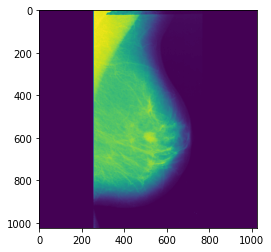

In [ ]:
plt.imshow(unknown_image)

In [ ]:
import cv2

img = cv2.resize(unknown_image, (224,224))
img.shape     # The image is reshaped to (224,224)

(224, 224)

In [ ]:
preds  = loaded_model.predict(img.reshape(1,224,224,1))
preds  # The prediction is a probability value from sigmoid function

array([[0.991715]], dtype=float32)

In [ ]:
# preds= new_model.predict(img.reshape(1,224,224,1))
# preds      # The prediction is a probability value from sigmoid function

In [ ]:
if preds <= 0.5:
    print("The cancer is Malignant")
else:
    print("The cancer is Benign")

The cancer is Benign


In [ ]:
info

,level_0,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
4,5,12,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...,...,...
117,118,281,mdb274,F,MISC,M,127.0,505.0,123.0
118,119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
119,120,319,mdb312,F,MISC,B,240.0,263.0,20.0
120,121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [ ]:
#=========/===========================================================================================

In [ ]:
from matplotlib.image import imread
from tensorflow.keras.models import load_model
import cv2

loaded_model = load_model('Model')
# loaded_model = load_model('Model')
image_location = '/content/mdb314.pgm'

unknown_image = imread(image_location)
unknown_image.shape   # You will see (1024,1024) image


img = cv2.resize(unknown_image, (224, 224))
preds = loaded_model.predict(img.reshape(1, 224, 224, 1))

result = None

if preds <= 0.5:
    print("The cancer is Malignant")
    result = False
else:
    print("The cancer is Benign")
    result = True


The cancer is Benign
